<a href="https://colab.research.google.com/github/rizwannitk/machinelearning/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series 

In [ ]:
!pip install download

In [73]:
# for all  imports
from download import download
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns

In [ ]:
path=download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip',"/content/sample_data/tmp/aq",kind="zip",replace=True)

In [10]:
ls -alrt /content/sample_data/tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Dec  4 10:32 ../
-rw-r--r-- 1 root root 2835916 Dec  4 10:32 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Dec  4 10:32 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Dec  4 10:32 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Dec  4 10:32 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Dec  4 10:32 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Dec  4 10:32 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Dec  4 10:32 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Dec  4 10:32 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Dec  4 10:32 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Dec  4 10:32 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Dec  4 10:32 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr

In [11]:
df=pd.read_csv("/content/sample_data/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")

In [ ]:
df.head()
df.info()



In [14]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [20]:

aq_df = pd.read_csv('/content/sample_data/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)

In [21]:
aq_df.head()

year_month_day_hour  No  year month day  ...  DEWP  RAIN   wd  WSPM   station
0 2013-03-01 00:00:00   1  2013     3   1  ... -19.7   0.0    E   0.5  Dingling
1 2013-03-01 01:00:00   2  2013     3   1  ... -19.0   0.0  ENE   0.7  Dingling
2 2013-03-01 02:00:00   3  2013     3   1  ... -19.9   0.0  ENE   0.2  Dingling
3 2013-03-01 03:00:00   4  2013     3   1  ... -19.1   0.0  NNE   1.0  Dingling
4 2013-03-01 04:00:00   5  2013     3   1  ... -19.4   0.0    N   2.1  Dingling

[5 rows x 19 columns]

In [22]:
  aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [24]:
aq_df["month"]=pd.to_numeric(aq_df["month"])

In [25]:
print ("Rows     : " ,aq_df.shape[0])
print ("Columns  : " ,aq_df.shape[1])
print ("\nFeatures : \n" ,aq_df.columns.tolist())
print ("\nMissing values :  ", aq_df.isnull().any())
print ("\nUnique values :  \n",aq_df.nunique())

Rows     :  35064
Columns  :  19

Features : 
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values :   year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique values :  
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5         

In [26]:
aq_df_non_indexed=aq_df.copy()

In [27]:
aq_df=aq_df.set_index("year_month_day_hour")

In [ ]:
aq_df.index

In [30]:
aq_df.loc['2013-03-01':'2013-03-05']

No  year  month day hour  ...  DEWP  RAIN   wd  WSPM   station
year_month_day_hour                             ...                                 
2013-03-01 00:00:00    1  2013      3   1    0  ... -19.7   0.0    E   0.5  Dingling
2013-03-01 01:00:00    2  2013      3   1    1  ... -19.0   0.0  ENE   0.7  Dingling
2013-03-01 02:00:00    3  2013      3   1    2  ... -19.9   0.0  ENE   0.2  Dingling
2013-03-01 03:00:00    4  2013      3   1    3  ... -19.1   0.0  NNE   1.0  Dingling
2013-03-01 04:00:00    5  2013      3   1    4  ... -19.4   0.0    N   2.1  Dingling
...                  ...   ...    ...  ..  ...  ...   ...   ...  ...   ...       ...
2013-03-05 19:00:00  116  2013      3   5   19  ...  -7.6   0.0  NNE   0.2  Dingling
2013-03-05 20:00:00  117  2013      3   5   20  ...  -7.3   0.0  NNE   0.7  Dingling
2013-03-05 21:00:00  118  2013      3   5   21  ...  -7.3   0.0  NNE   0.2  Dingling
2013-03-05 22:00:00  119  2013      3   5   22  ...  -7.0   0.0    N   1.7  Dingling
2013-03-05 23:00:00  120  2013      3   5   23  ...  -6.9   0.0   NE   0.4  Dingling

[120 rows x 18 columns]

In [31]:
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

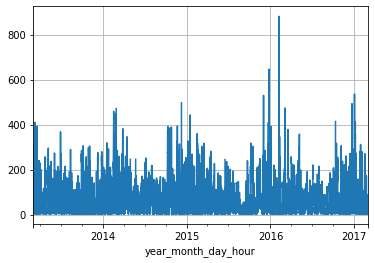

In [33]:
pm_data.plot(grid=True)

In [34]:
aq_df_2015=aq_df.loc["2015"]

In [35]:
pm_data_2015=aq_df_2015["PM2.5"]

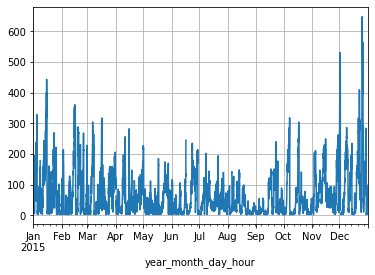

In [36]:
pm_data_2015.plot(grid=True)

In [38]:
import plotly.express as px
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [39]:
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [44]:
df_2014= aq_df['2014'].reset_index()
df_2015 = aq_df['2015'].reset_index()

In [41]:
df_2014.head()

year_month_day_hour    No  year  month day  ...  DEWP  RAIN   wd  WSPM   station
0 2014-01-01 00:00:00  7345  2014      1   1  ... -15.9   0.0  WSW   5.2  Dingling
1 2014-01-01 01:00:00  7346  2014      1   1  ... -16.2   0.0    W   3.6  Dingling
2 2014-01-01 02:00:00  7347  2014      1   1  ... -15.6   0.0  WNW   5.3  Dingling
3 2014-01-01 03:00:00  7348  2014      1   1  ... -15.8   0.0  WNW   4.7  Dingling
4 2014-01-01 04:00:00  7349  2014      1   1  ... -15.2   0.0    W   3.5  Dingling

[5 rows x 19 columns]

Text(0.5, 1.0, 'Air Quality plot for the year 2014 and 2015')

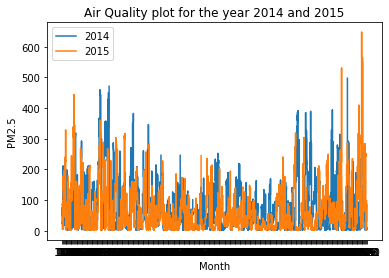

In [50]:
df_2014["month_day_hour"]=df_2014.apply(lambda x :str(x['month'])+"-"+x['day'],axis=1)
df_2015["month_day_hour"]=df_2015.apply(lambda x :str(x['month'])+"-"+x['day'],axis=1)
plt.plot(df_2014["month_day_hour"],df_2014["PM2.5"])
plt.plot(df_2015["month_day_hour"],df_2015["PM2.5"])
plt.legend(['2014', '2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for the year 2014 and 2015')

In [52]:
aq_df['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

Check  realtionship between Temp

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc283f06a58>,
      dtype=object)

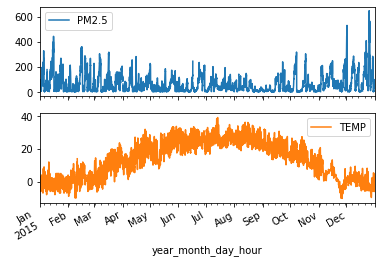

In [53]:
aq_df_2015=aq_df['2015']
pm_data_2015=aq_df_2015[['PM2.5','TEMP']]
pm_data_2015.plot(subplots=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc282316ac8>,
      dtype=object)

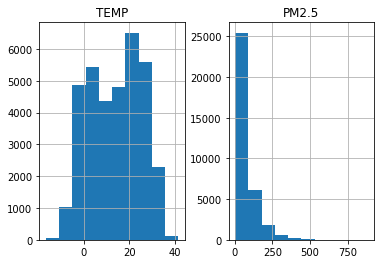

In [54]:
aq_df[["TEMP","PM2.5"]].hist()

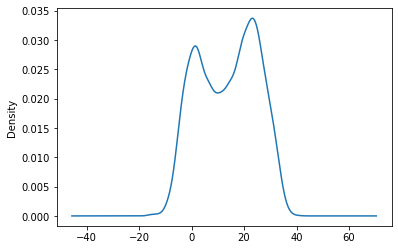

In [56]:
aq_df["TEMP"].plot(kind='density')

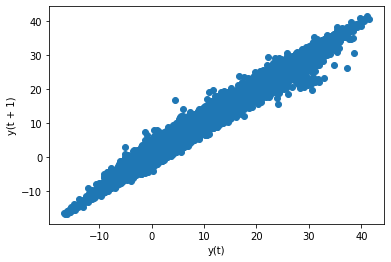

In [57]:
pd.plotting.lag_plot(aq_df["TEMP"],lag=1)

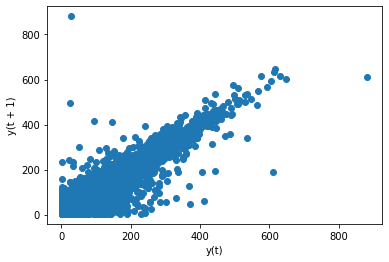

In [58]:
pd.plotting.lag_plot(aq_df["PM2.5"],lag=1)

In [ ]:
#aq_df[aq_df['PM2.5']>700]

aq_df.loc['2016-02-08':'2016-02-08']
#aq_df[aq_df["year_month_day_hour"]=='2016-02-08']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc275604b38>,
      dtype=object)

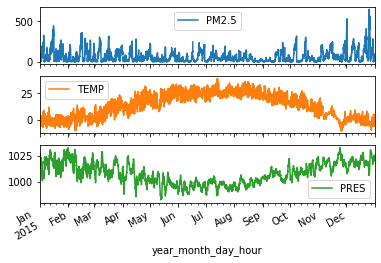

In [71]:
aq_df_2015=aq_df['2015']
pm_data_2015=aq_df_2015[['PM2.5','TEMP','PRES']]
pm_data_2015.plot(subplots=True)

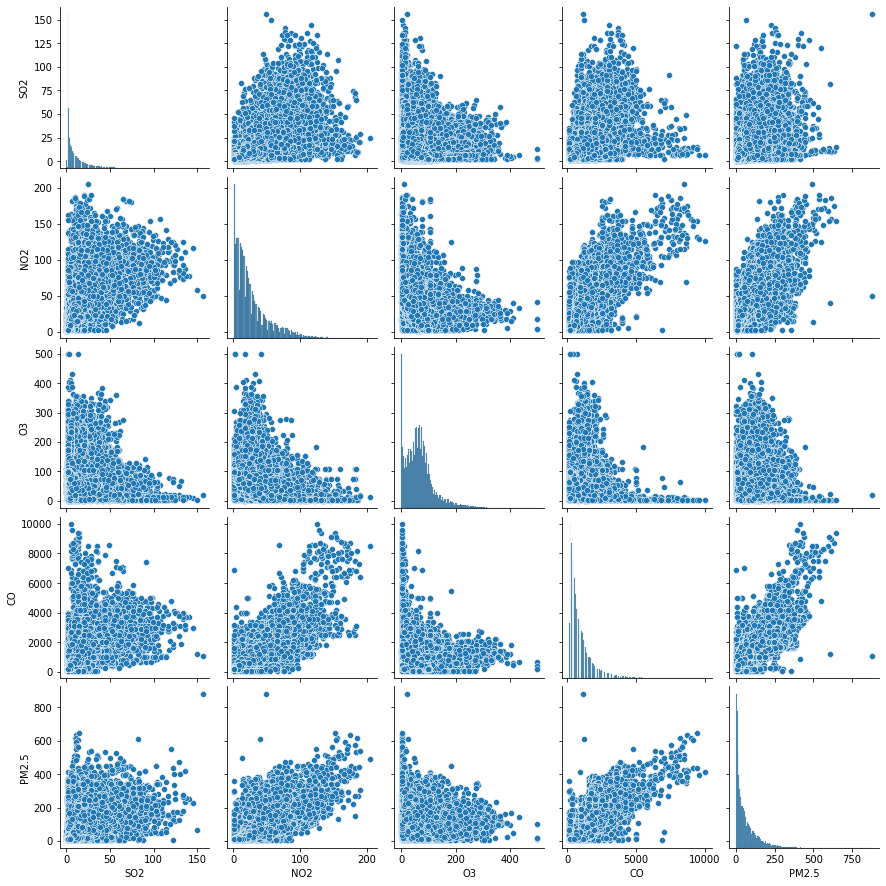

In [74]:
g = sns.pairplot(aq_df[['SO2','NO2','O3', 'CO','PM2.5']])

In [75]:

aq_corr=aq_df[['SO2','NO2','O3', 'CO','PM2.5']].corr(method='pearson')
aq_corr

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

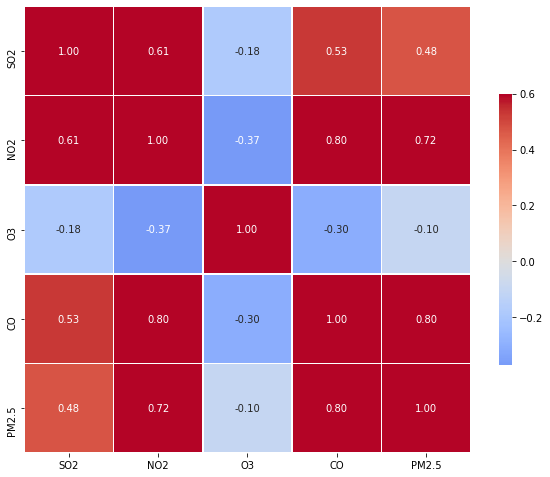

In [76]:

g = sns.heatmap(aq_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
plt.show()

In [77]:

aq_df_na = aq_df.copy()
aq_df_na=aq_df_na.dropna()

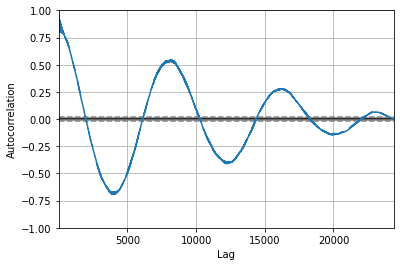

In [78]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

# Missing Values

In [79]:
aq_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
aq_df.query('TEMP!=TEMP')

In [83]:
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='TEMP', title='PM2.5 with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [84]:
aq_df_na = aq_df.copy()
aq_df_na=aq_df_na.dropna()

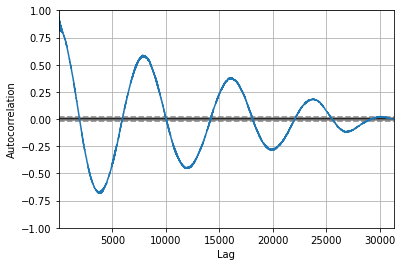

In [85]:
pd.plotting.autocorrelation_plot(aq_df_na["TEMP"])

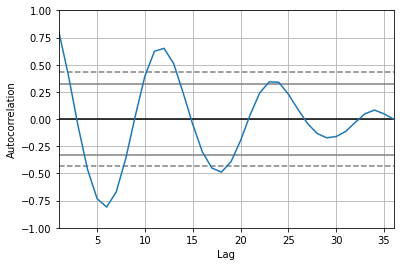

In [86]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample("1m").mean())

In [87]:
aq_df_imp=aq_df['2015-02-21 10':'2015-02-21 23'][['TEMP']]

In [88]:
aq_df_imp['TEMP_FFILL']=aq_df_imp['TEMP'].fillna(method='ffill')

In [92]:
aq_df_imp

TEMP  TEMP_FFILL  TEMP_BFILL
year_month_day_hour                              
2015-02-21 10:00:00   1.0         1.0         1.0
2015-02-21 11:00:00   1.0         1.0         1.0
2015-02-21 12:00:00   NaN         1.0         2.0
2015-02-21 13:00:00   2.0         2.0         2.0
2015-02-21 14:00:00   NaN         2.0         4.0
2015-02-21 15:00:00   4.0         4.0         4.0
2015-02-21 16:00:00   4.0         4.0         4.0
2015-02-21 17:00:00   3.0         3.0         3.0
2015-02-21 18:00:00   2.0         2.0         2.0
2015-02-21 19:00:00   1.0         1.0         1.0
2015-02-21 20:00:00   NaN         1.0        -1.0
2015-02-21 21:00:00  -1.0        -1.0        -1.0
2015-02-21 22:00:00  -1.0        -1.0        -1.0
2015-02-21 23:00:00  -2.0        -2.0        -2.0

In [91]:
aq_df_imp['TEMP_BFILL']=aq_df_imp['TEMP'].fillna(method='bfill')

In [93]:
aq_df_imp['TEMP_ROLLING']=aq_df_imp['TEMP'].rolling(window=2, min_periods=1).mean()

In [94]:
aq_df_imp

TEMP  TEMP_FFILL  TEMP_BFILL  TEMP_ROLLING
year_month_day_hour                                            
2015-02-21 10:00:00   1.0         1.0         1.0           1.0
2015-02-21 11:00:00   1.0         1.0         1.0           1.0
2015-02-21 12:00:00   NaN         1.0         2.0           1.0
2015-02-21 13:00:00   2.0         2.0         2.0           2.0
2015-02-21 14:00:00   NaN         2.0         4.0           2.0
2015-02-21 15:00:00   4.0         4.0         4.0           4.0
2015-02-21 16:00:00   4.0         4.0         4.0           4.0
2015-02-21 17:00:00   3.0         3.0         3.0           3.5
2015-02-21 18:00:00   2.0         2.0         2.0           2.5
2015-02-21 19:00:00   1.0         1.0         1.0           1.5
2015-02-21 20:00:00   NaN         1.0        -1.0           1.0
2015-02-21 21:00:00  -1.0        -1.0        -1.0          -1.0
2015-02-21 22:00:00  -1.0        -1.0        -1.0          -1.0
2015-02-21 23:00:00  -2.0        -2.0        -2.0          -1.5

# Moving Average

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv')
df.head()

Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0  1/1/2016      365    1423.5         219.0         247.73            31
1  2/1/2016      292    1138.8         175.2         234.11            31
2  3/1/2016      130     507.0          78.0         123.85            29
3  4/1/2016      117     456.3          70.2         111.22            29
4  5/1/2016      136     530.4          81.6         118.37            29

In [97]:
def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/electricity_consumption.csv',parse_dates=["Bill_Date"],date_parser=parse)
df.head()

Bill_Date  On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
0 2016-01-01      365    1423.5         219.0         247.73            31
1 2016-02-01      292    1138.8         175.2         234.11            31
2 2016-03-01      130     507.0          78.0         123.85            29
3 2016-04-01      117     456.3          70.2         111.22            29
4 2016-05-01      136     530.4          81.6         118.37            29

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bill_Date      53 non-null     datetime64[ns]
 1   On_peak        53 non-null     int64         
 2   Off_peak       53 non-null     float64       
 3   Usage_charge   53 non-null     float64       
 4   Billed_amount  53 non-null     float64       
 5   Billing_days   53 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.6 KB


In [101]:
df.isnull().sum()

Bill_Date        0
On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64

In [102]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  53
Columns  :  6

Features : 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing values :   Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

Unique values :  
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [110]:
bill_df=df.set_index("Bill_Date")


In [111]:
bill_df.head()

On_peak  Off_peak  Usage_charge  Billed_amount  Billing_days
Bill_Date                                                               
2016-01-01      365    1423.5         219.0         247.73            31
2016-02-01      292    1138.8         175.2         234.11            31
2016-03-01      130     507.0          78.0         123.85            29
2016-04-01      117     456.3          70.2         111.22            29
2016-05-01      136     530.4          81.6         118.37            29

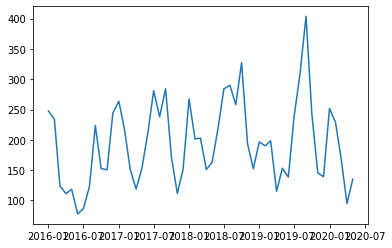

In [107]:
plt.plot(df["Billed_amount"])

In [114]:
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]

In [113]:
bill_2018.head()

Billed_amount
Bill_Date                
2016-01-01         247.73
2016-02-01         234.11
2016-03-01         123.85
2016-04-01         111.22
2016-05-01         118.37

In [115]:
bill_2018["Moving_Average"]=bill_2018['Billed_amount'].rolling(window=3).mean().shift(1)

In [116]:
bill_2018

Billed_amount  Moving_Average
Bill_Date                                
2016-01-01         247.73             NaN
2016-02-01         234.11             NaN
2016-03-01         123.85             NaN
2016-04-01         111.22      201.896667
2016-05-01         118.37      156.393333
2016-06-01          77.81      117.813333
2016-07-01          86.67      102.466667
2016-08-01         122.40       94.283333
2016-09-01         223.62       95.626667
2016-10-01         152.54      144.230000
2016-11-01         150.54      166.186667
2016-12-01         244.37      175.566667
2017-01-01         263.64      182.483333
2017-02-01         214.32      219.516667
2017-03-01         151.54      240.776667
2017-04-01         118.79      209.833333
2017-05-01         153.18      161.550000
2017-06-01         212.08      141.170000
2017-07-01         281.19      161.350000
2017-08-01         237.97      215.483333
2017-09-01         284.30      243.746667
2017-10-01         172.69      267.820000
2017-11-01         111.51      231.653333
2017-12-01         151.42      189.500000
2018-01-01         267.32      145.206667
2018-02-01         201.35      176.750000
2018-03-01         202.91      206.696667
2018-04-01         150.86      223.860000
2018-05-01         163.07      185.040000
2018-06-01         219.76      172.280000
2018-07-01         283.98      177.896667
2018-08-01         290.15      222.270000
2018-09-01         257.96      264.630000
2018-10-01         327.19      277.363333
2018-11-01         193.49      291.766667
2018-12-01         152.34      259.546667

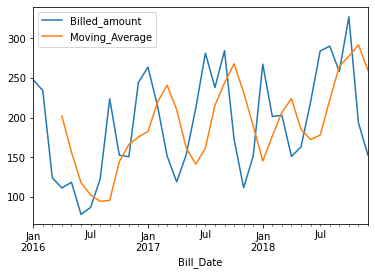

In [117]:

bill_2018.plot();

In [119]:
#wieghted average
def wma(weights): 
  def calc(x):
    return (weights*x).mean()
  return calc

In [120]:
bill_2018['wma_rolling_3']=bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [121]:
bill_2018

Billed_amount  Moving_Average  wma_rolling_3
Bill_Date                                               
2016-01-01         247.73             NaN            NaN
2016-02-01         234.11             NaN            NaN
2016-03-01         123.85             NaN            NaN
2016-04-01         111.22      201.896667     181.250000
2016-05-01         118.37      156.393333     135.911667
2016-06-01          77.81      117.813333     116.900000
2016-07-01          86.67      102.466667      96.898333
2016-08-01         122.40       94.283333      89.000000
2016-09-01         223.62       95.626667     103.058333
2016-10-01         152.54      144.230000     167.055000
2016-11-01         150.54      166.186667     171.210000
2016-12-01         244.37      175.566667     163.386667
2017-01-01         263.64      182.483333     197.788333
2017-02-01         214.32      219.516667     238.366667
2017-03-01         151.54      240.776667     235.768333
2017-04-01         118.79      209.833333     191.150000
2017-05-01         153.18      161.550000     145.628333
2017-06-01         212.08      141.170000     141.443333
2017-07-01         281.19      161.350000     176.898333
2017-08-01         237.97      215.483333     236.818333
2017-09-01         284.30      243.746667     248.061667
2017-10-01         172.69      267.820000     268.338333
2017-11-01         111.51      231.653333     220.773333
2017-12-01         151.42      189.500000     160.701667
2018-01-01         267.32      145.206667     141.661667
2018-02-01         201.35      176.750000     202.718333
2018-03-01         202.91      206.696667     215.018333
2018-04-01         150.86      223.860000     213.125000
2018-05-01         163.07      185.040000     176.625000
2018-06-01         219.76      172.280000     165.640000
2018-07-01         283.98      177.896667     189.380000
2018-08-01         290.15      222.270000     242.421667
2018-09-01         257.96      264.630000     276.361667
2018-10-01         327.19      277.363333     273.026667
2018-11-01         193.49      291.766667     297.940000
2018-12-01         152.34      259.546667     248.801667

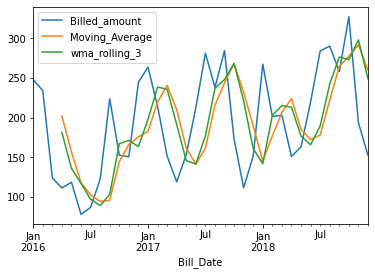

In [122]:
bill_2018.plot()

Exponential moving average = (Close - previous EMA) * (2/(span+1)) + previous EMA


Exponential moving average = (Close - previous EMA) * (2 / n+1) + previous EMA

In [124]:

bill_2018['ewm_window_3']=bill_2018['Billed_amount'].ewm(span=3, adjust=False, min_periods=0).mean().shift(1)

In [125]:
bill_2018

Billed_amount  Moving_Average  wma_rolling_3  ewm_window_3
Bill_Date                                                             
2016-01-01         247.73             NaN            NaN           NaN
2016-02-01         234.11             NaN            NaN    247.730000
2016-03-01         123.85             NaN            NaN    240.920000
2016-04-01         111.22      201.896667     181.250000    182.385000
2016-05-01         118.37      156.393333     135.911667    146.802500
2016-06-01          77.81      117.813333     116.900000    132.586250
2016-07-01          86.67      102.466667      96.898333    105.198125
2016-08-01         122.40       94.283333      89.000000     95.934063
2016-09-01         223.62       95.626667     103.058333    109.167031
2016-10-01         152.54      144.230000     167.055000    166.393516
2016-11-01         150.54      166.186667     171.210000    159.466758
2016-12-01         244.37      175.566667     163.386667    155.003379
2017-01-01         263.64      182.483333     197.788333    199.686689
2017-02-01         214.32      219.516667     238.366667    231.663345
2017-03-01         151.54      240.776667     235.768333    222.991672
2017-04-01         118.79      209.833333     191.150000    187.265836
2017-05-01         153.18      161.550000     145.628333    153.027918
2017-06-01         212.08      141.170000     141.443333    153.103959
2017-07-01         281.19      161.350000     176.898333    182.591980
2017-08-01         237.97      215.483333     236.818333    231.890990
2017-09-01         284.30      243.746667     248.061667    234.930495
2017-10-01         172.69      267.820000     268.338333    259.615247
2017-11-01         111.51      231.653333     220.773333    216.152624
2017-12-01         151.42      189.500000     160.701667    163.831312
2018-01-01         267.32      145.206667     141.661667    157.625656
2018-02-01         201.35      176.750000     202.718333    212.472828
2018-03-01         202.91      206.696667     215.018333    206.911414
2018-04-01         150.86      223.860000     213.125000    204.910707
2018-05-01         163.07      185.040000     176.625000    177.885353
2018-06-01         219.76      172.280000     165.640000    170.477677
2018-07-01         283.98      177.896667     189.380000    195.118838
2018-08-01         290.15      222.270000     242.421667    239.549419
2018-09-01         257.96      264.630000     276.361667    264.849710
2018-10-01         327.19      277.363333     273.026667    261.404855
2018-11-01         193.49      291.766667     297.940000    294.297427
2018-12-01         152.34      259.546667     248.801667    243.893714

In [128]:
#Exponential Smoothing -

bill_2018['esm_window_3_7']=bill_2018['Billed_amount'].ewm(alpha=0.7, adjust=False,min_periods=3).mean().shift(1)

In [129]:
bill_2018

Billed_amount  Moving_Average  ...  ewm_window_3  esm_window_3_7
Bill_Date                                  ...                              
2016-01-01         247.73             NaN  ...           NaN             NaN
2016-02-01         234.11             NaN  ...    247.730000             NaN
2016-03-01         123.85             NaN  ...    240.920000             NaN
2016-04-01         111.22      201.896667  ...    182.385000      158.153800
2016-05-01         118.37      156.393333  ...    146.802500      125.300140
2016-06-01          77.81      117.813333  ...    132.586250      120.449042
2016-07-01          86.67      102.466667  ...    105.198125       90.601713
2016-08-01         122.40       94.283333  ...     95.934063       87.849514
2016-09-01         223.62       95.626667  ...    109.167031      112.034854
2016-10-01         152.54      144.230000  ...    166.393516      190.144456
2016-11-01         150.54      166.186667  ...    159.466758      163.821337
2016-12-01         244.37      175.566667  ...    155.003379      154.524401
2017-01-01         263.64      182.483333  ...    199.686689      217.416320
2017-02-01         214.32      219.516667  ...    231.663345      249.772896
2017-03-01         151.54      240.776667  ...    222.991672      224.955869
2017-04-01         118.79      209.833333  ...    187.265836      173.564761
2017-05-01         153.18      161.550000  ...    153.027918      135.222428
2017-06-01         212.08      141.170000  ...    153.103959      147.792728
2017-07-01         281.19      161.350000  ...    182.591980      192.793819
2017-08-01         237.97      215.483333  ...    231.890990      254.671146
2017-09-01         284.30      243.746667  ...    234.930495      242.980344
2017-10-01         172.69      267.820000  ...    259.615247      271.904103
2017-11-01         111.51      231.653333  ...    216.152624      202.454231
2017-12-01         151.42      189.500000  ...    163.831312      138.793269
2018-01-01         267.32      145.206667  ...    157.625656      147.631981
2018-02-01         201.35      176.750000  ...    212.472828      231.413594
2018-03-01         202.91      206.696667  ...    206.911414      210.369078
2018-04-01         150.86      223.860000  ...    204.910707      205.147723
2018-05-01         163.07      185.040000  ...    177.885353      167.146317
2018-06-01         219.76      172.280000  ...    170.477677      164.292895
2018-07-01         283.98      177.896667  ...    195.118838      203.119869
2018-08-01         290.15      222.270000  ...    239.549419      259.721961
2018-09-01         257.96      264.630000  ...    264.849710      281.021588
2018-10-01         327.19      277.363333  ...    261.404855      264.878476
2018-11-01         193.49      291.766667  ...    294.297427      308.496543
2018-12-01         152.34      259.546667  ...    243.893714      227.991963

[36 rows x 5 columns]

In [131]:
((bill_2018['Billed_amount']-bill_2018['wma_rolling_3'])**2).mean()**0.5

65.82572602256133

# decompose